In [3]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [4]:
#import files 
mouse_df = pd.read_csv(r"C:\Users\swamp\Desktop\HomeWork\mod5\Starter_Code\Pymaceuticals\data/Mouse_metadata.csv")
study_df = pd.read_csv(r"C:\Users\swamp\Desktop\HomeWork\mod5\Starter_Code\Pymaceuticals\data\Study_results.csv")
#merging
mouse_study_df = pd.merge(mouse_df, study_df, on="Mouse ID")
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
#finding the unique mice ids
mouse_id = mouse_study_df["Mouse ID"].nunique
print(f"Number of unique mice IDs: {mouse_id}")
#check for duplicate time points
duplicate_time_points = mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
cleaned_data = mouse_study_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
cleaned_data.head()

Number of unique mice IDs: <bound method IndexOpsMixin.nunique of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object>


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [108]:
#drug regimen column
grouped_data = cleaned_data.groupby("Drug Regimen")
summary_stats = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats.head()


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [112]:
#creating a valuecount for the drug reimen 
drug_regimen_df = mouse_study_df["Drug Regimen"].value_counts()
bar_width = 0.15
index = np.arange(len(summary_stats))

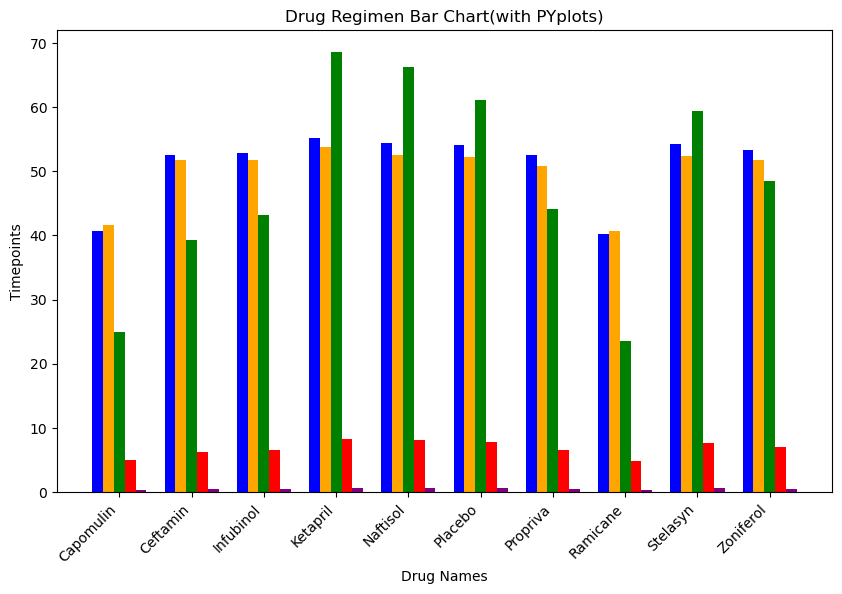

In [113]:
#making the bar charts for mouse id and timepoints for each drug regimen using pyplot.plot
plt.figure(figsize=(10, 6))
bar_positions = {
    "mean": index,
    'median': index + bar_width,
    'var': index + 2 * bar_width,
    "std": index + 3 * bar_width,
    "sem": index + 4 * bar_width
}
colors = {
    'mean': 'blue',
    'median': 'orange',
    'var': 'green',
    'std': 'red',
    'sem': 'purple'
}
for stat in summary_stats.columns:
    plt.bar(bar_positions[stat], summary_stats[stat], width=bar_width, label=stat, color=colors[stat])
plt.title("Drug Regimen Bar Chart(with PYplots)")
plt.xlabel("Drug Names")
plt.ylabel("Timepoints")
plt.xticks(index + 2 * bar_width,summary_stats.index, rotation=45, ha="right") 
plt.show()

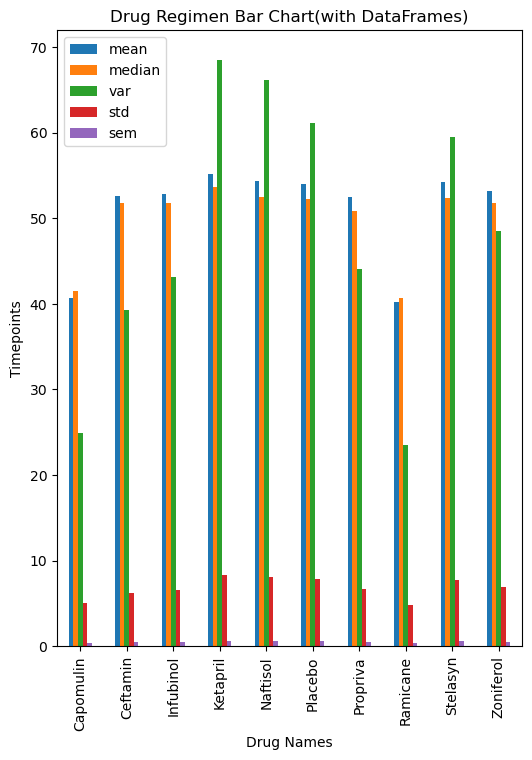

In [71]:
#making the bar charts for mouse id and timepoints for each drug regimen using dataframe.plot
drug_regimen_chart = summary_stats.plot(kind="bar", figsize=(6,8))
drug_regimen_chart.set_xlabel("Drug Names")
drug_regimen_chart.set_ylabel("Timepoints")
drug_regimen_chart.set_title("Drug Regimen Bar Chart(with DataFrames)")
plt.show()


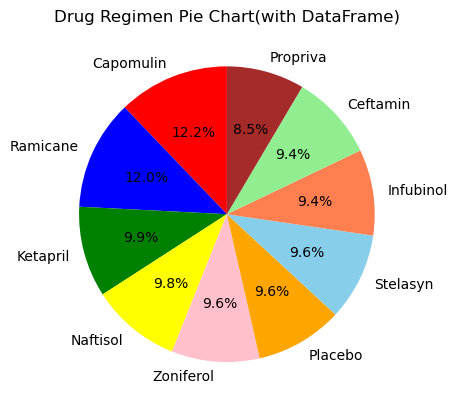

In [11]:
#making the pie charts for mouse id and timepoints for each drug regimen using dataframe.plot
drug_regimen_pie = drug_regimen_df.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["red", "blue", "green", "yellow", "pink", "orange", "skyblue", "coral", "lightgreen", "brown"])
drug_regimen_pie.set_title("Drug Regimen Pie Chart(with DataFrame)")
drug_regimen_pie.set_ylabel("")
drug_regimen_pie.set_aspect("equal")
plt.show()

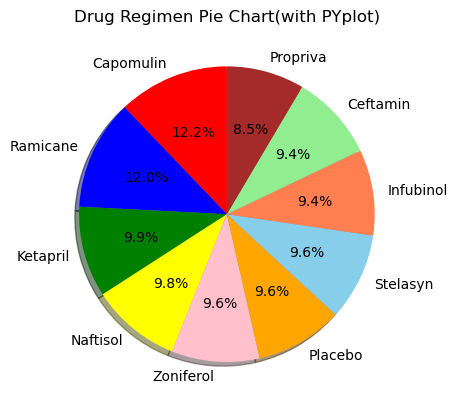

In [115]:
#making a pie chart for drug regimen using pyplot
labels = drug_regimen_df.index
sizes = drug_regimen_df
colors = ("red", "blue", "green", "yellow", "pink", "orange", "skyblue", "coral", "lightgreen", "brown")
plt.title("Drug Regimen Pie Chart(with PYplot)")
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()

In [13]:
#separating the genders of the mice
gender_count_df = mouse_study_df["Sex"].value_counts()
gender_count_df.head()

Sex
Male      958
Female    935
Name: count, dtype: int64

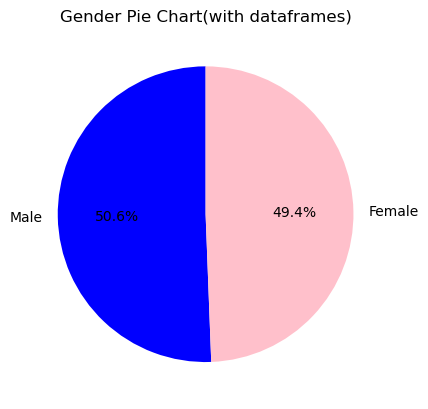

In [14]:
#showing the gender different in a pie chart using dataframes
gender_pie_df = gender_count_df.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=("blue", "pink"))
gender_pie_df.set_title("Gender Pie Chart(with dataframes)")
gender_pie_df.set_ylabel("")
gender_pie_df.set_aspect("equal")
plt.show()

In [15]:
#making an index for the gender difference
gender_count_df.index


Index(['Male', 'Female'], dtype='object', name='Sex')

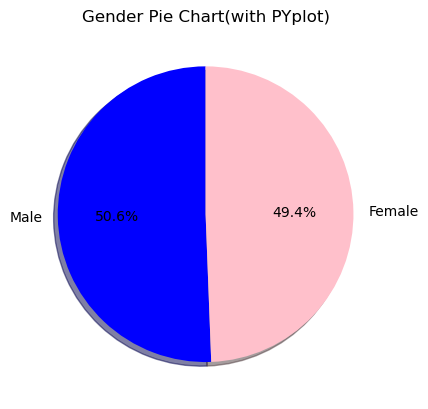

In [16]:
#making a pie chart for the gender difference using pyplot
labels = gender_count_df.index
sizes = gender_count_df
colors = ("blue", "pink")
plt.title("Gender Pie Chart(with PYplot)")
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()

In [18]:
max_time = mouse_study_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
merged_df = pd.merge(max_time, mouse_study_df, on=["Mouse ID", "Timepoint"], how="left")
selected_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volumes = {treatment: [] for treatment in selected_drug}
for treatment in selected_drug:
    treatment_df = merged_df[merged_df["Drug Regimen"] == treatment]
    final_tumor_volumes[treatment] = treatment_df["Tumor Volume (mm3)"].values
    


In [19]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
for treatment in selected_drug:
        volumes = final_tumor_volumes[treatment] 
        quartiles = np.percentile(volumes, [25, 50, 75])
        quart1, quart3 = quartiles[0], quartiles[2]
        IQR = quart3 - quart1
        lower_bound = quart1 - 1.5 * IQR
        upper_bound = quart3 + 1.5 * IQR
        outlier = volumes[(volumes < lower_bound) | (volumes > upper_bound)]

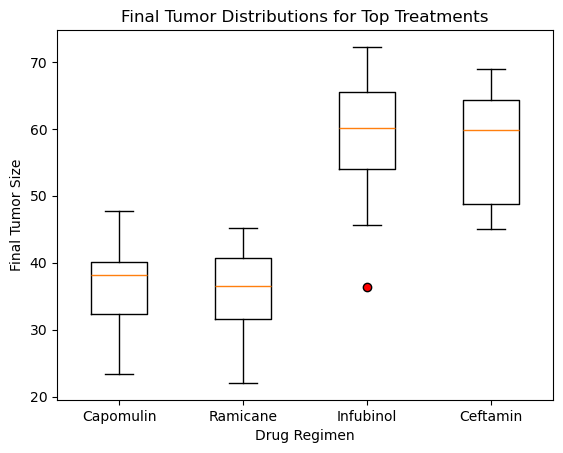

In [20]:
tumor_data = [final_tumor_volumes[treatment] for treatment in selected_drug]
fig, ax1 = plt.subplots()
box_plot = ax1.boxplot(tumor_data, labels=selected_drug, flierprops=dict(markerfacecolor="r", marker="o"))
ax1.set_title("Final Tumor Distributions for Top Treatments")
ax1.set_ylabel("Final Tumor Size")
ax1.set_xlabel("Drug Regimen")
plt.show()

In [21]:
capomulin_data = mouse_study_df[mouse_study_df["Drug Regimen"] == "Capomulin"]
single_mouse_id = capomulin_data["Mouse ID"].iloc[0]
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == single_mouse_id]


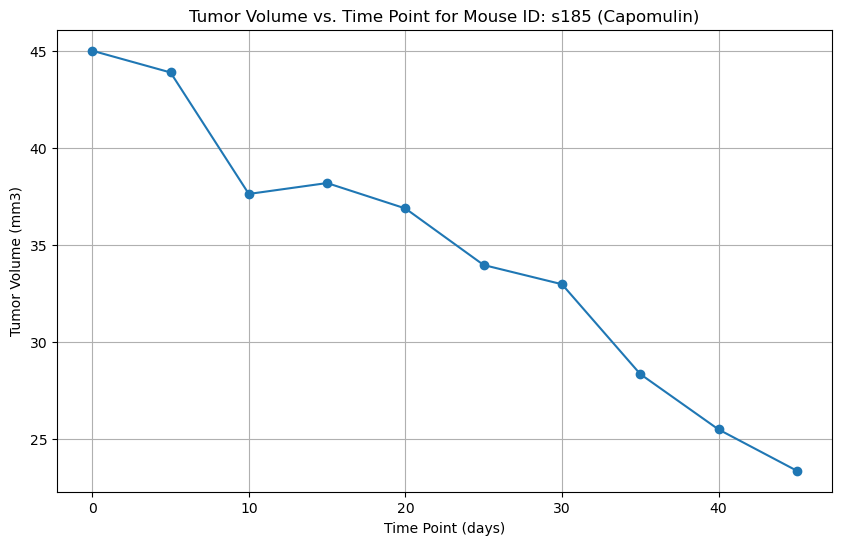

In [22]:
plt.figure(figsize=(10,6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker="o")
plt.title(f'Tumor Volume vs. Time Point for Mouse ID: {single_mouse_id} (Capomulin)')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

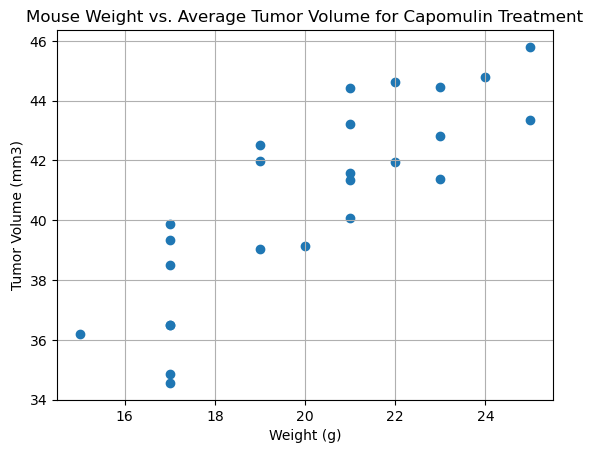

In [50]:
ave_tumor_capomulin = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()
tumor_weight = pd.DataFrame({
    "Weight (g)": mouse_weight,
    "Tumor Volume (mm3)": ave_tumor_capomulin
})
plt.scatter(tumor_weight["Weight (g)"], tumor_weight["Tumor Volume (mm3)"])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

The correlation between mouse weight and how the capomulin affected the tumor is 0.84


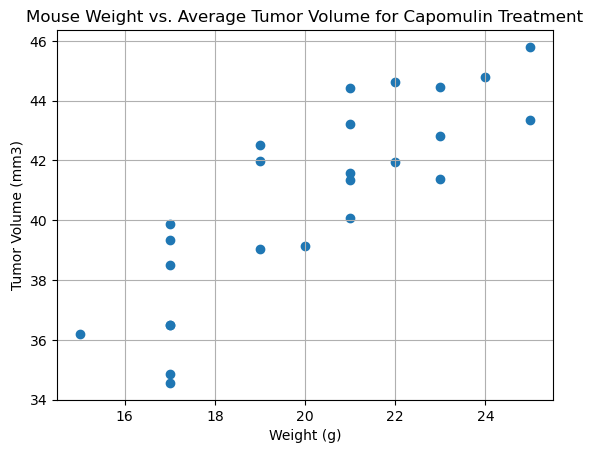

In [55]:
correlation = st.pearsonr(mouse_weight,ave_tumor_capomulin)
plt.scatter(tumor_weight["Weight (g)"], tumor_weight["Tumor Volume (mm3)"])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The correlation between mouse weight and how the capomulin affected the tumor is {round(correlation[0],2)}")
plt.grid()
plt.show()